In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

c:\Users\Admin\anaconda3\envs\quant\Lib\site-packages\yfinance\scrapers\history.py:204: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed


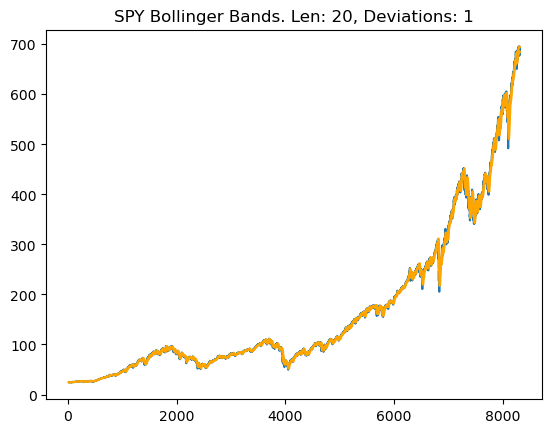

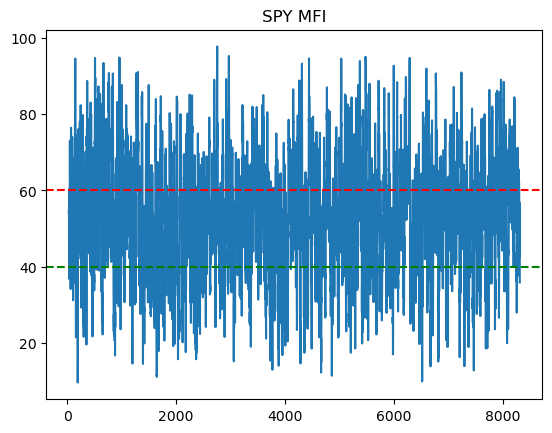

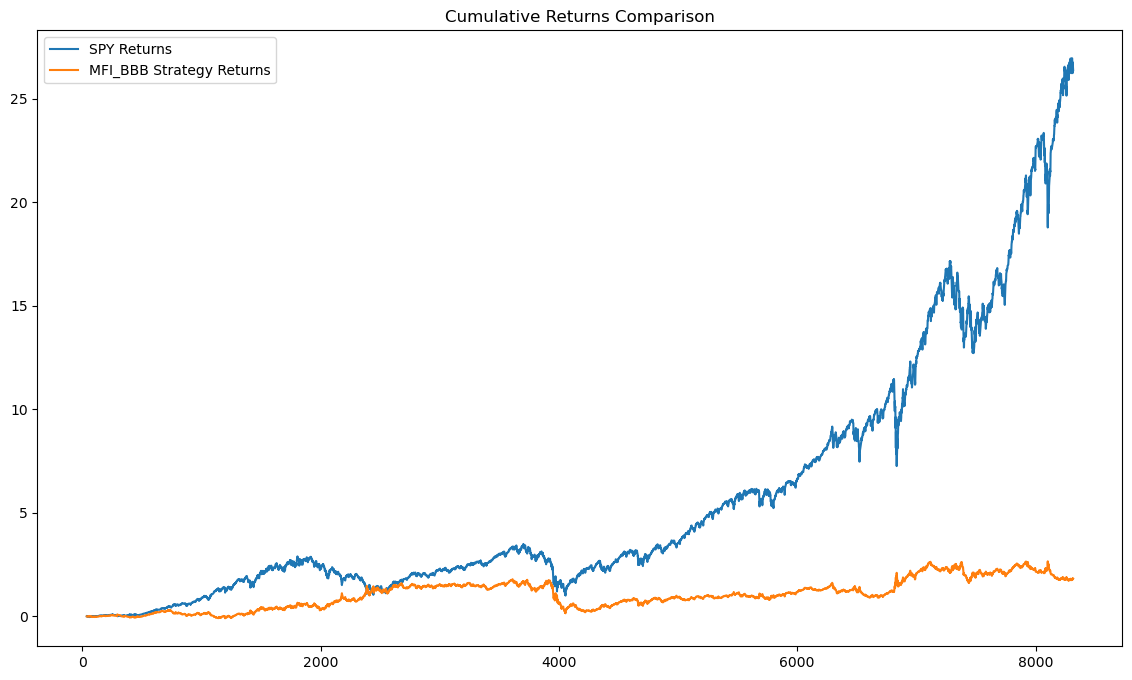

Price,Date,Close,High,Low,Open,Volume,BB_SMA,STD,Upper_Band,Lower_Band,...,Average_price,Money_flow,Positive_flow,Negative_flow,MFI,MFI_strategy,full_strategy,strategy,Asset_returns,strategy_returns
36,1993-03-23,24.875587,24.910233,24.840942,24.892910,55200,24.853784,0.252797,25.106581,24.600987,...,24.875587,1.373132e+06,1.373132e+06,0.000000e+00,37.733873,NaN,NaN,NaN,NaN,NaN
38,1993-03-25,25.031481,25.083449,24.858253,24.892898,110100,24.905169,0.211407,25.116576,24.693761,...,24.991061,2.751516e+06,2.751516e+06,0.000000e+00,42.883365,1.0,1.0,0.0,0.006267,0.000000
39,1993-03-26,24.892895,25.031477,24.875572,25.014154,101500,24.924812,0.188827,25.113640,24.735985,...,24.933315,2.530731e+06,0.000000e+00,2.530731e+06,39.348356,1.0,1.0,0.0,0.000696,0.000000
40,1993-03-29,24.996843,25.118103,24.910229,24.910229,87100,24.953101,0.149183,25.102284,24.803918,...,25.008392,2.178231e+06,2.178231e+06,0.000000e+00,36.783610,1.0,1.0,0.0,0.004874,0.000000
43,1993-04-01,24.962193,25.083452,24.910224,25.083452,129500,24.984539,0.137365,25.121903,24.847174,...,24.985290,3.235595e+06,0.000000e+00,3.235595e+06,60.393660,1.0,1.0,0.0,0.003482,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8309,2026-02-03,689.530029,696.960022,684.030029,696.210022,107904600,691.196994,4.193050,695.390044,687.003944,...,690.173360,7.447288e+10,0.000000e+00,7.447288e+10,50.468302,-1.0,0.0,-1.0,26.719146,1.790934
8310,2026-02-04,686.190002,691.450012,681.760010,690.349976,105204600,690.915994,4.335694,695.251688,686.580300,...,686.466675,7.221945e+10,0.000000e+00,7.221945e+10,50.046249,-1.0,-1.0,-1.0,26.584876,1.804454
8311,2026-02-05,677.619995,683.690002,675.789978,680.940002,113610800,690.317993,5.256641,695.574635,685.061352,...,679.033325,7.714552e+10,0.000000e+00,7.714552e+10,42.373519,-1.0,-2.0,-1.0,26.240362,1.839479
8312,2026-02-06,690.619995,692.309998,680.849976,681.460022,89127600,690.373492,5.253520,695.627013,685.119972,...,687.926656,6.131325e+10,6.131325e+10,0.000000e+00,49.178107,-1.0,-2.0,-1.0,26.762962,1.785004


In [25]:
ticker = "SPY"
interval = '1d'

#set period based on interval
if interval == '1h':
    period = "max"
else:
    period = "max"

MFI_LENGTH = 14
MFI_OVERBOUGHT = 60
MFI_OVERSOLD = 40

LOOKBACK = -10000

BB_LENGTH = 20 
devs= 1

def get_data(ticker, lookback=LOOKBACK, interval=interval, period=period):
    df = yf.download(ticker, period = period, auto_adjust=True, interval=interval)
    #reset index to get datetime as a column
    df = df.reset_index()

    df.sort_index(inplace=True)
    df.columns = df.columns.get_level_values(0)

    #only return data after lookback
    return df.iloc[lookback:,:]

def add_bollinger_bands(df, BB_LENGTH, devs): 
    df['BB_SMA'] = df['Close'].rolling(window=BB_LENGTH).mean() 
    df['STD'] = df['Close'].rolling(window=BB_LENGTH).std()
    df['Upper_Band'] = df['BB_SMA'] + (df['STD'] * devs)
    df['Lower_Band'] = df['BB_SMA'] - (df['STD'] * devs)

    df = df.dropna()

    plt.figure()
    plt.plot(df['Close'])
    plt.plot(df['Upper_Band'], color='orange')
    plt.plot(df['Lower_Band'], color='orange')
    plt.title(f'{ticker} Bollinger Bands. Len: {BB_LENGTH}, Deviations: {devs}')

    return df

def BB_strategy(df):
    df['BB_strategy'] = 0

    conditions = [
        (df['Close'] > df["Upper_Band"]), # Condition 1: Short
        (df['Close'] < df["Lower_Band"]),
        (df['Close'] > df['BB_SMA']) & (df['Close'].shift(1) < df['BB_SMA']), 
        ((df['Close'] < df['BB_SMA']) & (df['Close'].shift(1) > df['BB_SMA']))   
    ]
    choices = [1, -1, 0, 0]
    df['signal'] = np.select(conditions, choices, default=np.nan)

    df['BB_strategy'] = df['signal'].ffill()
    df['BB_strategy'] = df['BB_strategy'].fillna(0)

    df['BB_strategy'] = df['BB_strategy'].shift(1)
    return df

def add_MFI(df, MFI_LENGTH):

    df['Average_price'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['Money_flow'] = df['Average_price'] * df['Volume']

    #initialize empty flows
    df['Positive_flow'] = 0
    df['Negative_flow'] = 0

    df['Positive_flow'] = np.where(df['Average_price'] > df['Average_price'].shift(1), df['Money_flow'], 0)
    df['Negative_flow'] = np.where(df['Average_price'] < df['Average_price'].shift(1), df['Money_flow'], 0)

    mfr = df['Positive_flow'].rolling(window=MFI_LENGTH).sum() / df['Negative_flow'].rolling(window=MFI_LENGTH).sum()
    df['MFI'] = 100 - (100 / (1 + mfr))

    plt.figure()
    plt.plot(df['MFI'])
    plt.axhline(MFI_OVERBOUGHT, color='red', linestyle='--')    
    plt.axhline(MFI_OVERSOLD, color='green', linestyle='--')
    plt.title(f'{ticker} MFI')

    return df.dropna()

def MFI_strategy(df, OVERBOUGHT = MFI_OVERBOUGHT, OVERSOLD = MFI_OVERSOLD):
    # 1. Create purely Buy (1) and Sell (-1) signals, use NaN for "do nothing"
    conditions = [
        (df['MFI'] > OVERBOUGHT), # Condition 1: Short
        (df['MFI'] < OVERSOLD)    # Condition 2: Long
    ]
    choices = [-1, 1]
    
    # Use np.select to assign 1 or -1, but default to NaN (np.nan) instead of 0
    df['signal'] = np.select(conditions, choices, default=np.nan)

    # 2. Forward Fill (The Memory)
    # This says: "If today is NaN, copy yesterday's position."
    df['MFI_strategy'] = df['signal'].ffill()

    # 3. Handle the start (replace initial NaNs with 0)
    df['MFI_strategy'] = df['MFI_strategy'].fillna(0)

    # 4. Shift to trade "tomorrow"
    df['MFI_strategy'] = df['MFI_strategy'].shift(1)

    return df

def add_full_strategy(df):
    df['full_strategy'] = df['MFI_strategy'] + df['BB_strategy']

    conditions = [
        (df['full_strategy'] == 2), 
        (df['full_strategy'] == -2)   ]
    choices = [1, -1]
    
    df['signal'] = np.select(conditions, choices, default=np.nan)

    df['strategy'] = df['signal'].ffill()
    df['strategy'] = df['strategy'].fillna(0)
    df['strategy'] = df['strategy'].shift(1)

    return df

def test_strategy(df):
    df['Asset_returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['strategy_returns'] = (1 + df['Close'].pct_change() * df['strategy']).cumprod() - 1

    plt.figure(figsize=(14,8))
    plt.plot(df['Asset_returns'], label=f'{ticker} Returns')
    plt.plot(df['strategy_returns'], label=f'MFI_BBB Strategy Returns')
    plt.legend()
    plt.title('Cumulative Returns Comparison')
    plt.show()

    return df

def main():
    df = get_data(ticker, LOOKBACK, interval, period)
    df = add_bollinger_bands(df, BB_LENGTH, devs)
    df = BB_strategy(df)
    df = add_MFI(df, MFI_LENGTH)
    df = MFI_strategy(df, MFI_OVERBOUGHT, MFI_OVERSOLD)
    df = add_full_strategy(df)
    df = test_strategy(df)
    plt.show()
    return df

df = main()
df